Section 01 - Type Annotations

In [34]:
# typed dictionary
from typing import TypedDict

class Movie(TypedDict):
    name: str
    year:int

movie = Movie(name="Avengers Endgame", year=2019)
print(movie)
# movie.name, movie.year will throw error
print(movie['name']) 
print(movie['year'])

{'name': 'Avengers Endgame', 'year': 2019}
Avengers Endgame
2019


In [35]:
# union
from typing import Union

def square(x: Union[int, float]) -> float:
    return x*x

x = 5
print(square(x))

X = 1.414
print(square(X))

# X = 'hello'
# print(square(X)) will throw error due to type annotation using union

25
1.9993959999999997


In [36]:
# optional
from typing import Optional

def nice_message(name: Optional[str]) -> None:
    if name is None:
        print("Hello World!!")
    else:
        print(f"Hi {name} !!")

print(nice_message('nemesis'))

Hi nemesis !!
None


In [37]:
# any
from typing import Any

def print_value(x: Any):
    print(x)

print_value("hello world")

hello world


In [38]:
# lambda function
square = lambda x: x*x
print(square(10))

nums = [1,2,3,4]
squares = list(map(lambda x: x*x, nums))
print(squares)

100
[1, 4, 9, 16]


Section 02 - Elements

In [39]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.


GRAPH 1 : BASIC GRAPH

In [40]:
#creating our first langgraph
from typing import TypedDict
from langgraph.graph import StateGraph  #framework that helps to design and manage the flow of tasks in our application using a graph

In [41]:
#now we create an AgentState - shared data structure that keeps track of information as our application runs
class AgentState(TypedDict):  #our state schema
    message: str

#creating our first node
def greeting_node(state: AgentState) -> AgentState:
    # simple node that adds a greeting message to the state
    state['message'] = "Hi " + state['message'] + ", welcome to LangGraph tutorial !!"
    return state

In [42]:
#creating langgraph
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter") #setting the entry point of our graph and connecting it to the greet node
graph.set_finish_point("greeter") #setting the exit point of our graph and connecting it to the greet node

app = graph.compile() #compiling the graph to create an application

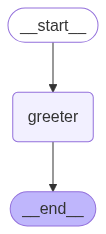

In [43]:
#visualise the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
result = app.invoke({"message" : "Nemesis"})
result["message"]

'Hi Nemesis, welcome to LangGraph tutorial !!'